In [1]:
import pandas as pd

# Clean and condense test items

In [2]:
test_items = pd.read_csv('data/test.csv')

In [3]:
test_items.drop(['id','date','store_nbr','onpromotion'], axis=1, inplace=True)

In [4]:
unique_test_items = test_items.item_nbr.unique()
print(len(unique_test_items), unique_test_items)

3901 [  96995   99197  103501 ..., 2132945 2132957 2134244]


In [5]:
test_items.drop_duplicates(['item_nbr'], keep='first', inplace=True)
test_items.sort_values(['item_nbr'], inplace=True)
test_items.reset_index(drop=True, inplace=True)
test_items.to_csv('new_data/test_items.csv', index=False)

In [6]:
test_items

,item_nbr
0,96995
1,99197
2,103501
3,103520
4,103665
5,105574
6,105575
7,105576
8,105577
9,105693


# Clean and condense train items

In [7]:
train_items = pd.read_csv('data/train.csv')

/Users/farmboy5/Desktop/p3_workspace/venv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
train_items.drop(['id','date','store_nbr','unit_sales','onpromotion'], axis=1, inplace=True)

In [9]:
unique_train_items = train_items.item_nbr.unique()
print(len(unique_train_items), unique_train_items)

4036 [ 103665  105574  105575 ..., 2126944 2123839 2011451]


In [10]:
train_items.drop_duplicates(['item_nbr'], keep='first', inplace=True)
train_items.sort_values(['item_nbr'], inplace=True)
train_items.reset_index(drop=True, inplace=True)
train_items.to_csv('new_data/train_items.csv', index=False)

In [11]:
train_items

,item_nbr
0,96995
1,99197
2,103501
3,103520
4,103665
5,105574
6,105575
7,105576
8,105577
9,105693


In [12]:
del train_items, test_items, unique_train_items, unique_test_items

# Compare unique train and test items with each other, then with items.csv

In [1]:
import numpy as np
import pandas as pd
train_items = pd.read_csv('new_data/train_items.csv')
test_items = pd.read_csv('new_data/test_items.csv')
items_df = pd.read_csv('data/items.csv')

In [2]:
# See if there are unique items in train/test that are not in items.csv
unique_train_items = np.setdiff1d(train_items, items_df['item_nbr'])
unique_test_items = np.setdiff1d(test_items, items_df['item_nbr'])

print(len(unique_train_items), unique_train_items, '\n\n')
print(len(unique_test_items), unique_train_items)

0 [] 


0 []


In [3]:
# See if there are unique items in train/test that are not in test/train
test_not_in_train = np.setdiff1d(test_items, train_items)
train_not_in_test = np.setdiff1d(train_items, test_items)

print(len(test_not_in_train), test_not_in_train, '\n\n')
print(len(train_not_in_test), train_not_in_test)

60 [ 313094 1464607 1467088 1467093 2015646 2109969 2112280 2112303 2112461
 2112462 2112607 2117783 2118397 2120180 2120216 2120506 2120681 2120768
 2121319 2124705 2125814 2126696 2127024 2127069 2127175 2127206 2127544
 2127651 2127733 2127825 2127921 2127992 2128628 2128799 2129334 2129350
 2129387 2129515 2129616 2129678 2129786 2129790 2129892 2129994 2130131
 2130219 2130265 2130352 2130474 2130521 2130526 2130553 2131010 2131572
 2131699 2132163 2132318 2132945 2132957 2134244] 


195 [ 122418  179600  265086  265266  269029  315180  315753  354964  368628
  376483  410866  414305  416252  426155  514327  557420  567644  603255
  617763  639586  673496  675524  679604  716958  724359  730259  770447
  770449  813769  813770  819933  819934  830829  846163  847575  847859
  856687  856688  859529  864290  871514  874593  885543  930247  958514
  959437  988459 1036317 1047709 1066900 1074327 1084436 1090401 1097187
 1105210 1112450 1114567 1124164 1124165 1143691 1148017 1148018

In [4]:
# compare test_df to train/test sets
items_not_in_train = np.setdiff1d(items_df['item_nbr'], train_items)
items_not_in_test = np.setdiff1d(items_df['item_nbr'], test_items)

print(len(items_not_in_train), items_not_in_train, '\n\n')
print(len(items_not_in_test), items_not_in_test)

64 [ 313094  766493 1464607 1467088 1467093 1921118 2015646 2109969 2112280
 2112303 2112461 2112462 2112607 2116470 2117783 2118397 2120180 2120216
 2120506 2120681 2120768 2121319 2124705 2125814 2126696 2127024 2127069
 2127175 2127206 2127544 2127651 2127733 2127825 2127921 2127992 2128628
 2128799 2129334 2129350 2129387 2129515 2129616 2129678 2129786 2129790
 2129892 2129994 2130131 2130219 2130265 2130352 2130474 2130521 2130526
 2130553 2131010 2131572 2131699 2132163 2132318 2132945 2132957 2134058
 2134244] 


199 [ 122418  179600  265086  265266  269029  315180  315753  354964  368628
  376483  410866  414305  416252  426155  514327  557420  567644  603255
  617763  639586  673496  675524  679604  716958  724359  730259  766493
  770447  770449  813769  813770  819933  819934  830829  846163  847575
  847859  856687  856688  859529  864290  871514  874593  885543  930247
  958514  959437  988459 1036317 1047709 1066900 1074327 1084436 1090401
 1097187 1105210 1112450 111456

In [5]:
# Verify unique items not in train/test data sets
non_train_items = np.setdiff1d(items_not_in_train, test_not_in_train)
non_test_items = np.setdiff1d(items_not_in_test, train_not_in_test)

print(len(non_train_items), non_train_items)
print(len(non_test_items), non_test_items)
print(pd.DataFrame(non_train_items).equals(pd.DataFrame(non_test_items)))

4 [ 766493 1921118 2116470 2134058]
4 [ 766493 1921118 2116470 2134058]
True


In [6]:
# Check for null values
null_items = items_df.isnull()
null_items.describe()

,item_nbr,family,class,perishable
count,4100,4100,4100,4100
unique,1,1,1,1
top,False,False,False,False
freq,4100,4100,4100,4100


## Look at min/max and see if we can clarify the range in which certain item numbers fit sequentially between certain families and/or classes

In [7]:
family_groups = items_df.groupby('family')

### See what classes fall within families

In [8]:
# there is a definite grouping between the family and class that we can use
desc_fam_class = family_groups['class'].describe()
desc_fam_class.drop(['mean','std','25%','50%','75%'], axis=1, inplace=True)
desc_fam_class.sort_values(by='min', ascending=False, inplace=True)
desc_fam_class

,count,min,max
family,,,
LADIESWEAR,21.0,7780.0,7780.0
LINGERIE,20.0,7002.0,7034.0
LAWN AND GARDEN,26.0,6918.0,6960.0
AUTOMOTIVE,20.0,6806.0,6848.0
HARDWARE,4.0,6706.0,6706.0
PET SUPPLIES,14.0,6516.0,6517.0
SCHOOL AND OFFICE SUPPLIES,15.0,6404.0,6482.0
HOME AND KITCHEN II,45.0,6301.0,6393.0
HOME AND KITCHEN I,77.0,6206.0,6269.0


### See what item numbers fall within families

In [9]:
# no immediate grouping between families and item numbers, but perhaps we can find other correlations
desc_fam_items = family_groups['item_nbr'].describe()
desc_fam_items.drop(['mean','std','25%','50%','75%'], axis=1, inplace=True)
desc_fam_items.sort_values(by='min', ascending=False, inplace=True)
desc_fam_items

,count,min,max
family,,,
BOOKS,1.0,2017583.0,2017583.0
LADIESWEAR,21.0,1584293.0,1584399.0
CELEBRATION,31.0,1533338.0,1963459.0
PLAYERS AND ELECTRONICS,17.0,1532032.0,1963363.0
SCHOOL AND OFFICE SUPPLIES,15.0,1503117.0,2057387.0
BABY CARE,1.0,1490588.0,1490588.0
PET SUPPLIES,14.0,1471722.0,1931079.0
HOME CARE,108.0,1456881.0,2084706.0
MAGAZINES,6.0,1452378.0,2007265.0


In [10]:
class_groups = items_df.groupby('class')

In [11]:
desc_class_items = class_groups['item_nbr'].describe()
desc_class_items.drop(['mean','std','25%','50%','75%'], axis=1, inplace=True)
desc_class_items.sort_values(by='min', ascending=False, inplace=True)
desc_class_items

,count,min,max
class,,,
1328,1.0,2131010.0,2131010.0
1306,1.0,2123209.0,2123209.0
1370,1.0,2122947.0,2122947.0
1334,2.0,2112303.0,2116470.0
1156,1.0,2058907.0,2058907.0
2906,1.0,2056549.0,2056549.0
1316,1.0,2054605.0,2054605.0
6960,2.0,2049003.0,2075374.0
6924,1.0,2045834.0,2045834.0


In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

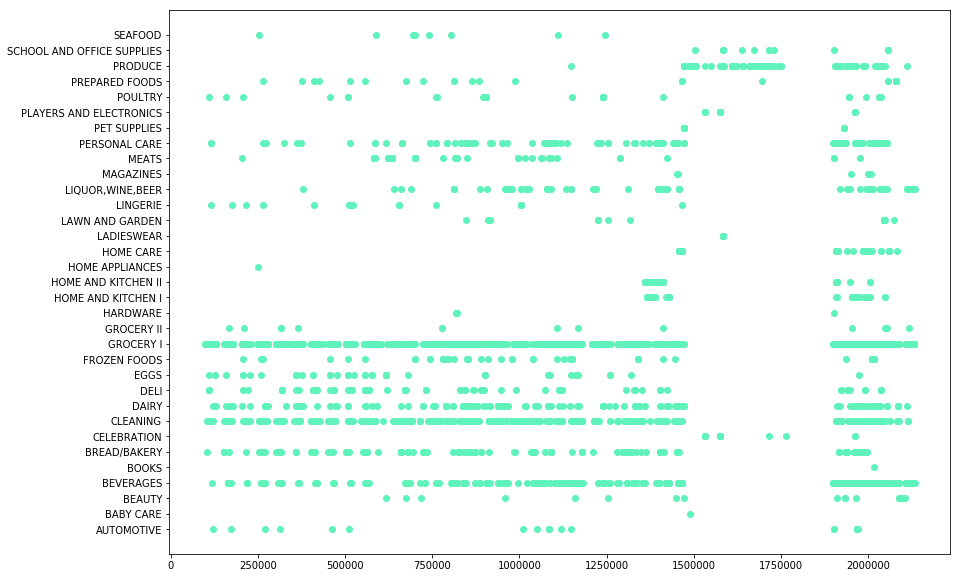

In [13]:
# generate visualization of item numbers in families
x_axis = items_df['item_nbr']
y_axis = items_df['family']

plt.figure(figsize=(14,10))
plt.scatter(x_axis, y_axis, c=np.random.rand(3,))

plt.show()

In [14]:
items_df['class'] = items_df['class'].astype('category')

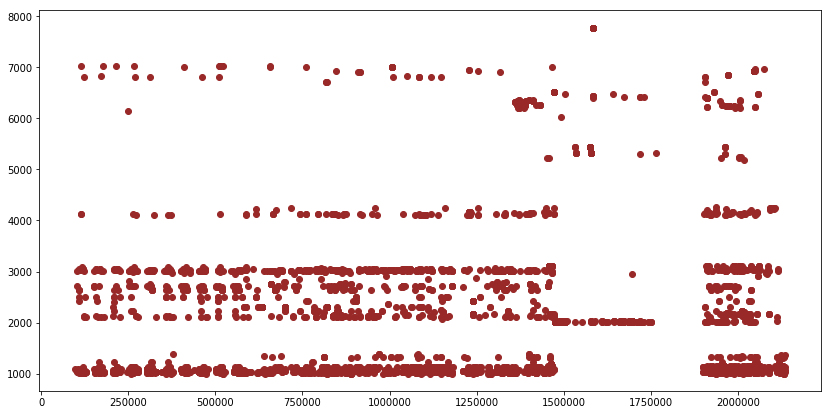

In [15]:
# generate visualization of item numbers in classes
x_axis = items_df['item_nbr']
y_axis = items_df['class']

plt.figure(figsize=(14,7))
plt.scatter(x_axis, y_axis, c=np.random.rand(3,))

plt.show()

In [16]:
items_df['family'].value_counts()

GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
PREPARED FOODS                  26
LAWN AND GARDEN                 26
LADIESWEAR                      21
AUTOMOTIVE                      20
LINGERIE                        20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
PET SUPPLIES                    14
GROCERY II                      14
SEAFOOD                          8
MAGAZINES           

In [17]:
items_df['class'].value_counts()

1016    133
1040    110
1124    100
1034     98
1122     81
1072     70
1032     65
1148     62
1120     61
3020     60
2302     59
1026     54
3106     53
1030     51
1042     51
1028     48
1114     42
3034     41
2006     41
4126     40
1190     40
1004     39
1074     39
1142     37
2502     36
2420     36
1126     36
3046     35
1144     35
2008     34
       ... 
2782      1
2340      1
2412      1
2640      1
3116      1
6404      1
6412      1
1380      1
1079      1
1083      1
5192      1
4255      1
1089      1
4250      1
4228      1
4212      1
4210      1
4198      1
4141      1
4140      1
1150      1
1153      1
1156      1
6426      1
4139      1
1316      1
1328      1
1336      1
1370      1
6322      1
Name: class, Length: 337, dtype: int64

In [18]:
items_df['perishable'].value_counts()

0    3114
1     986
Name: perishable, dtype: int64

In [19]:
family_df = pd.get_dummies(items_df['family'])
class_df = pd.get_dummies(items_df['class'], prefix='class_')

In [20]:
items_df = items_df.merge(family_df, left_index=True, right_index=True)
items_df = items_df.drop('family', axis=1)
items_df = items_df.merge(class_df, left_index=True, right_index=True)
items_df = items_df.drop('class', axis=1)
items_df

,item_nbr,perishable,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,...,class__6920,class__6922,class__6924,class__6936,class__6954,class__6960,class__7002,class__7016,class__7034,class__7780
0,96995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99197,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,103501,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,103520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,103665,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,105574,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,105575,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,105576,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,105577,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,105693,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
items_df.to_csv('new_data/new_items.csv', index=False)